# Knn model using only gps coordinates. 

This model is just here to have visualizations of knn model. 
I try to predict if accident causes injury by only knowing the exact location. 
I invite people who use this file to change the value of k-neighbors they want. 

We see that, the greater is k, the most area is considered dangerous. 

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sea

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
from matplotlib.colors import ListedColormap

import matplotlib.gridspec as gridspec

In [2]:
NSW_crash = pd.read_csv('NSW_crash_clean.csv', index_col=0)
NSW_crash.head()

,Crash ID,Degree of crash,Degree of crash - detailed,Year of crash,Month of crash,Day of week of crash,Latitude,Longitude,LGA,Urbanisation,Conurbation 1,Surface condition,Weather,Speed limit,Road classification (admin),hour,Injuries,Date of crash
0,1088679,Fatal,Fatal,2016,January,Saturday,-32.830075,148.293512,Parkes,Country non-urban,Rest of NSW - Rural,Dry,Fine,100,Local,1,1,2016-01-01
1,1088682,Fatal,Fatal,2016,January,Monday,-35.800954,150.132066,Eurobodalla,Country non-urban,Rest of NSW - Rural,Wet,Raining,100,State,21,1,2016-01-01
2,1088829,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-34.031609,151.067157,Sutherland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,70,State,13,0,2016-01-01
3,1088867,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-33.847025,150.967695,Cumberland,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Dry,Fine,50,Local,13,0,2016-01-01
4,1088880,Non-casualty (towaway),Non-casualty (towaway),2016,January,Friday,-33.873753,151.212595,Sydney,Sydney metro. area,Syd-Newc-Woll Gtr conurbation,Wet,Fine,50,Regional,17,0,2016-01-01


In [28]:
by_coor = NSW_crash[['Longitude', 'Latitude', 'Injuries']]
by_coor = by_coor[by_coor['Longitude']<155]


In [4]:
x_min, x_max = by_coor['Longitude'].min()-1, by_coor['Longitude'].max()+1
y_min, y_max = by_coor['Latitude'].min()-1, by_coor['Latitude'].max()+1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    

In [5]:
np.c_[xx.ravel(), yy.ravel()]

array([[140.055159, -38.388425],
       [140.065159, -38.388425],
       [140.075159, -38.388425],
       ...,
       [154.615159, -27.168425],
       [154.625159, -27.168425],
       [154.635159, -27.168425]])

In [29]:
n_neighbors = 35

clf = KNeighborsClassifier(n_neighbors, weights='distance')
X = by_coor[['Longitude', 'Latitude']]
y = by_coor['Injuries']

In [30]:
Z = clf.fit(X,y)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [31]:
Z = Z.reshape(xx.shape)

In [32]:
# Create color maps
cmap_light = ListedColormap(['#AAFFAA' , '#FFAAAA'])
cmap_bold = ListedColormap(['#00FF00' , '#FF0000'])

In [33]:
print(Z)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


C:\Users\ameli\AppData\Local\Temp\ipykernel_12548\2383534930.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


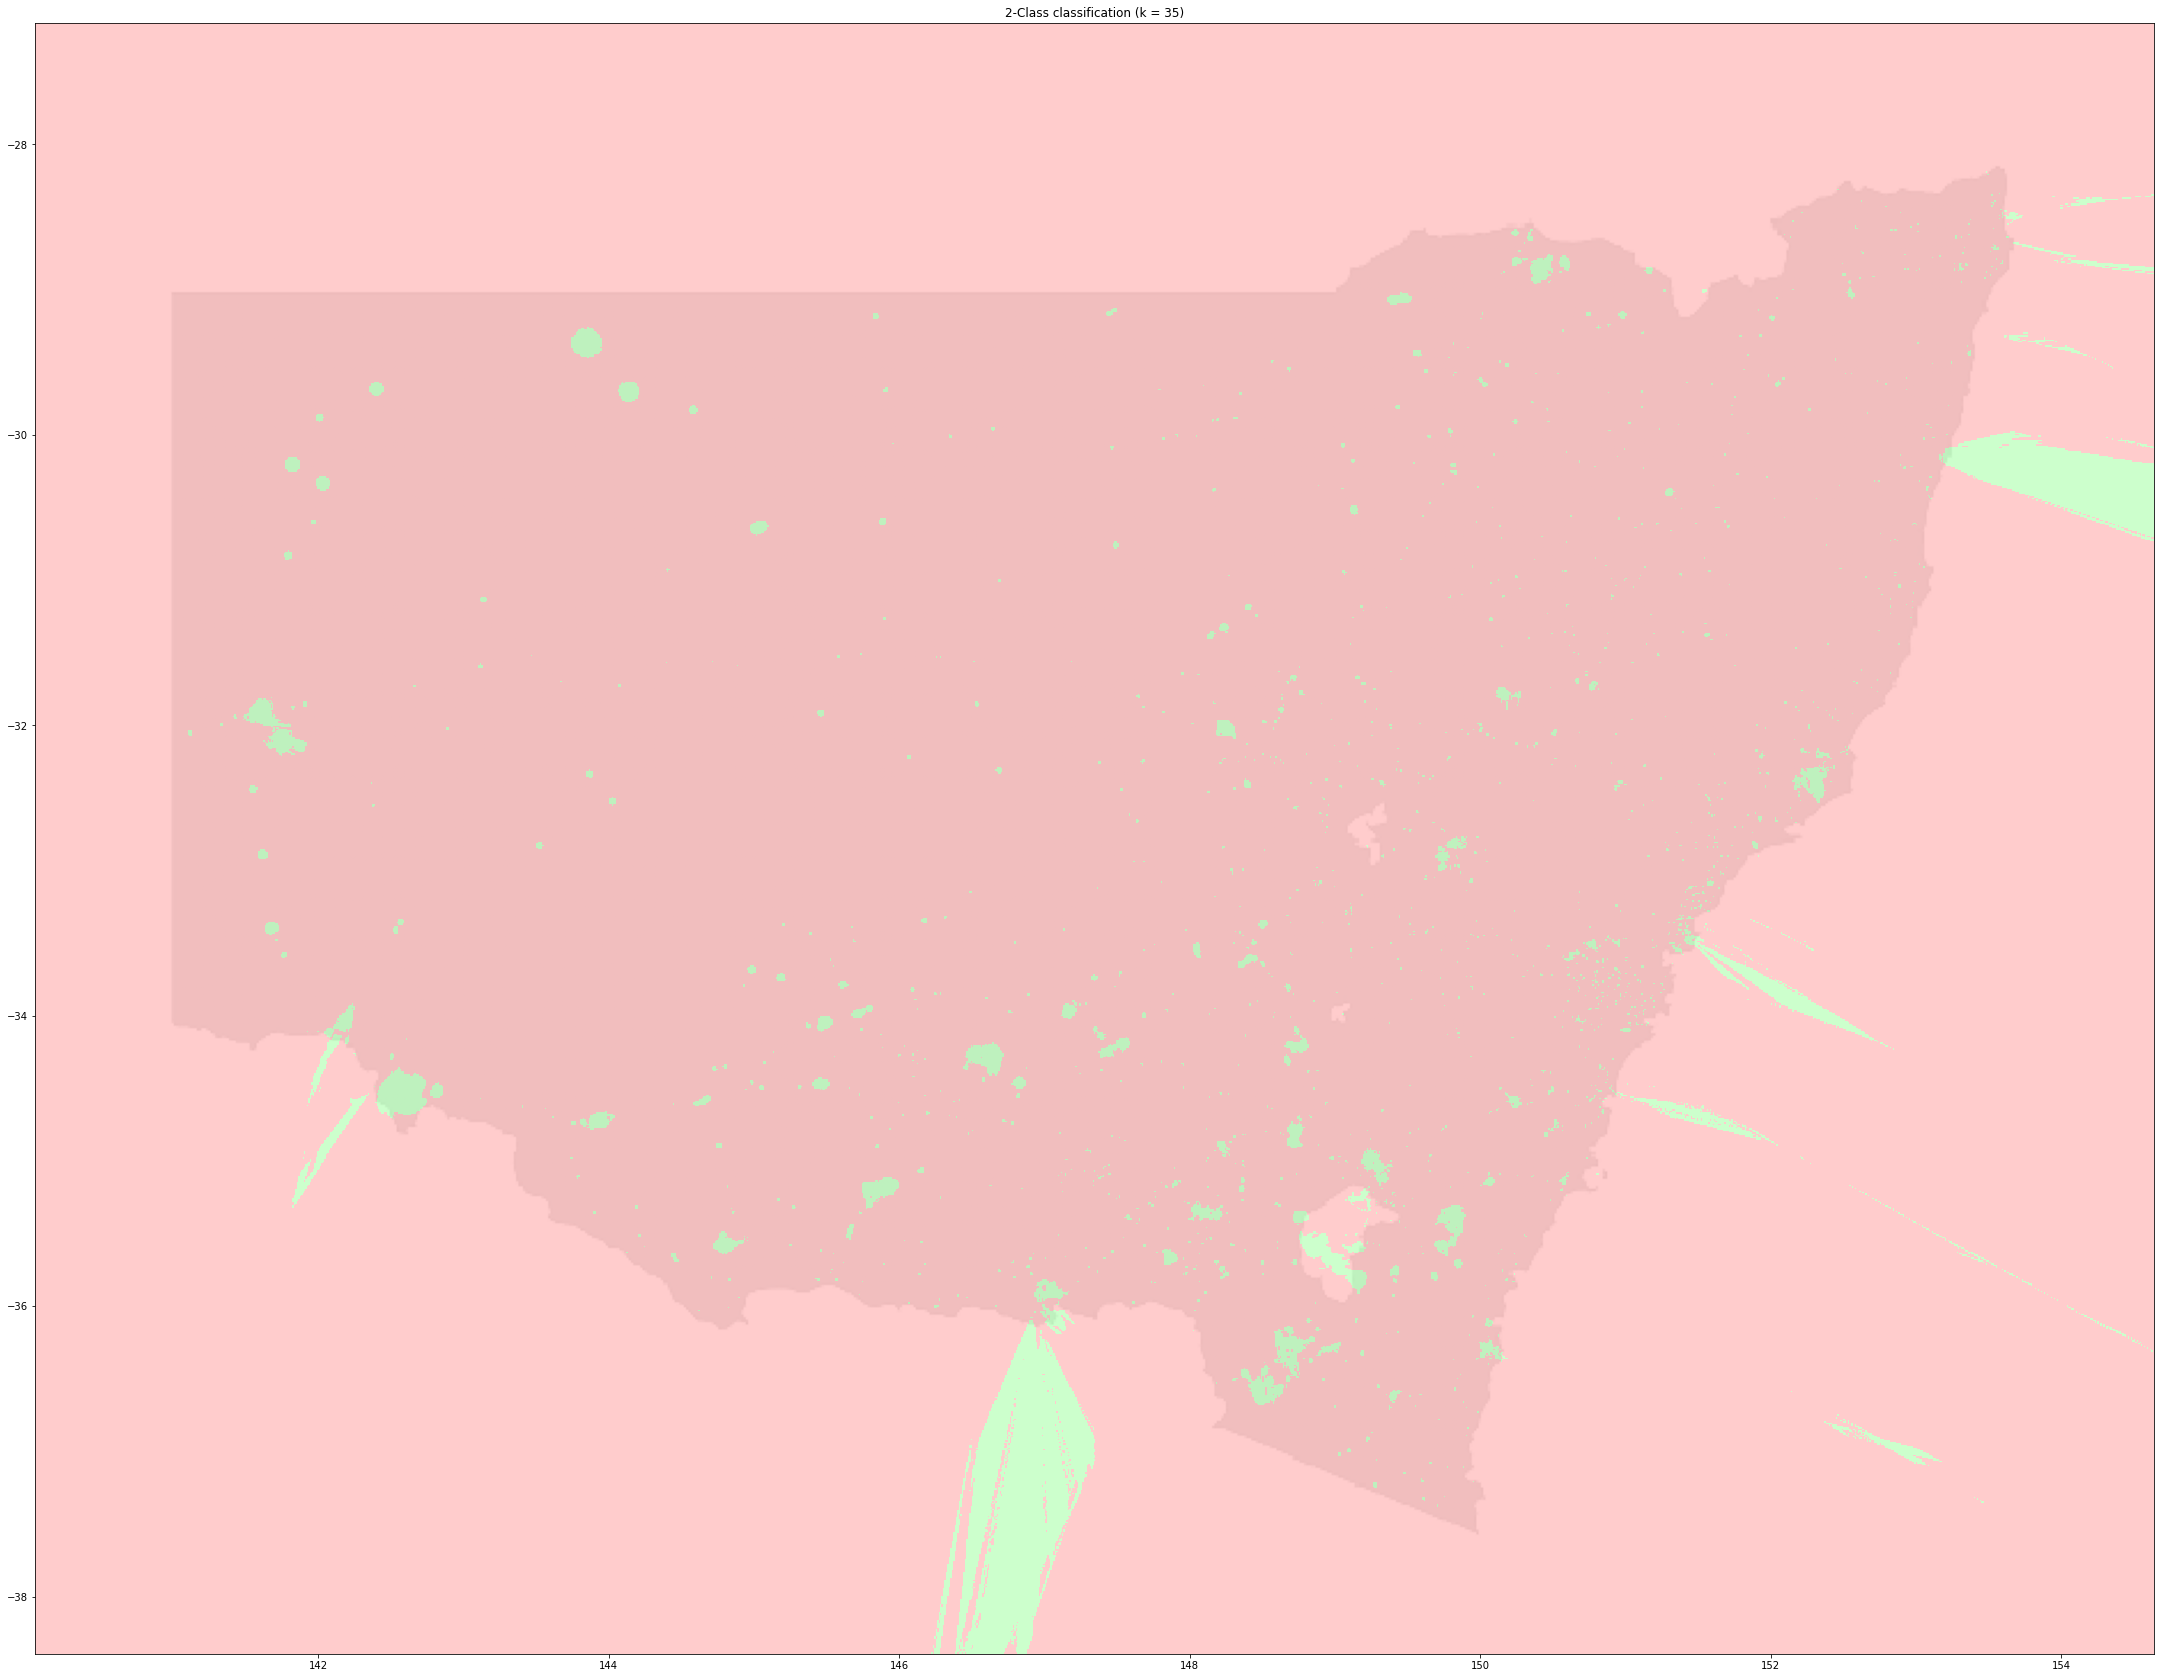

In [34]:


fig, ax= plt.subplots(figsize = (50,30))
img = plt.imread('NSW.PNG')
ax.imshow(img, extent=[xx.min(), xx.max(), yy.min(), yy.max()])
ax.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha = 0.6)

#ax.scatter(X['Longitude'], X['Latitude'], c=y, cmap=cmap_bold, alpha = 0.002)

ax.set_title("2-Class classification (k = %i)" % (n_neighbors))
fig.show()